# 노트북의 적정 최저가 예측하기

* 주제

노트북의 적정 최저가 예측하기

* 개요

최근 노트북을 구입하기 위해 다양한 스펙들을 가지고 있는 노트북들에 대해 알아보았습니다. 하지만 하드웨어, 노트북 제조사 등 모든 요구사항을 만족하는 노트북을 찾기는 쉽지않았습니다. 또한 그런 노트북을 찾았다 하더라도, 노트북에 책정된 가격이 적절한가에 대한 의문이 들었습니다. 이에 지금까지 판매되었던 노트북 데이터를 이용하여, 원하는 스펙을 가진 노트북의 적절한 인터넷 최저가를 예측하는 모델을 생성해보고자 합니다.

* 분석목적

원하는 스펙을 가진 노트북의 적정 인터넷 최저가 분석을 통한 합리적인 노트북 구입

## 기본 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#colab plot의 한글깨짐 해결
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
# !pip install selenium
# !pip install eli5
# !pip install shap
# !pip install pdpbox
# !pip install category_encoders
# !apt-get update
# !apt install chromium-chromedriver

## 데이터 수집(크롤링)

#### 1. 크롬 드라이버 생성

In [3]:
import time
from tqdm.notebook import tqdm
from selenium.webdriver import Chrome, ChromeOptions
from selenium import webdriver

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from bs4 import BeautifulSoup

#driver 설정
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')


#다나와 노트북 사이트 url 접속
url = 'http://prod.danawa.com/list/?cate=112758&15main_11_02'

driver = Chrome('chromedriver', chrome_options=chrome_options)
driver.get(url)

#### 2. 크롤링

In [4]:
list_laptop = []

#241페이지까지 노트북 정보 수집
for page in tqdm(range(1,242)):
    # print(page)
    soup = BeautifulSoup(driver.page_source)
    product_li_tags = soup.select('li.prod_item.prod_layer')

    #가격정보를 포함하여 총28개의 feature 생성
    for li in product_li_tags:
        name = li.select_one('p.prod_name a').text.strip()
        price = li.select_one('p.price_sect a strong').text.strip()
        
        a = li.select('dl.prod_spec_set a')
        
        try:
            size = a[0].text
            cpu_com = a[1].text
            cpu_gen = a[2].text
            cpu_type = a[3].text
            cpu = a[4].text
            core = a[5].text
            OS = a[6].text
            pixel = a[7].text
            display = a[8].text
            ram_type = a[9].text
            ram = a[10].text
            col1 = a[11].text
            col2 = a[12].text
            col3 = a[13].text
            col4 = a[14].text
            col5 = a[15].text
            col6 = a[16].text
            col7 = a[17].text
            col8 = a[18].text
            col9 = a[19].text
            col10 = a[20].text
            col11 = a[21].text
            col12 = a[22].text
            col13 = a[23].text
            col14 = a[24].text
            col15 = a[25].text
      
    
            list_laptop.append([name, price, size, cpu_com, cpu_gen, cpu_type, cpu, core, OS, pixel, display, ram_type, ram, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col14, col15])
        except:
            pass

        
    #페이지 넘김
    if page == 1:
        driver.find_element_by_xpath('//*[@id="productListArea"]/div[5]/div/div/a' + '[' + str(page+1) + ']').click()
    elif (page % 10) == 0:
        next = (page // 10)
        if next == 1:
            driver.find_element_by_xpath('//*[@id="productListArea"]/div[4]/div/a').click()
        else:
            driver.find_element_by_xpath('//*[@id="productListArea"]/div[4]/div/a[2]').click()
    else:
        button = (page % 10)
        driver.find_element_by_xpath('//*[@id="productListArea"]/div[4]/div/div/a' + '[' + str(button+1) + ']').click()

    time.sleep(4)

#### 3. csv파일생성

In [5]:
#데이터프레임 생성 및 csv파일생성
df = pd.DataFrame(list_laptop, columns = ['name', 'price', 'size', 'cpu_com', 'cpu_gen', 'cpu_type', 'cpu', 'core', 'OS', 'pixel', 'display', 'ram_type', 'ram', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15'])
df.to_csv('laptop_data.csv', encoding = 'utf-8-sig')
driver.quit()

## 데이터 생성

In [6]:
data = pd.read_csv('laptop_data_0426.csv', encoding = 'utf-8') #utf-8 sig 파일 불러오기

## EDA 및 전처리

#### 1. 데이터 확인

In [7]:
data.head()

,Unnamed: 0,name,price,size,cpu_com,cpu_gen,cpu_type,cpu,core,OS,pixel,display,ram_type,ram,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,0,LG전자 2021 울트라PC 15U50P-GR56K,"956,100",39.6cm(15.6인치),인텔,코어i5-11세대,타이거레이크,i5-1135G7 (2.4GHz),쿼드코어,운영체제(OS),윈도우10,1920x1080(FHD),IPS,DDR4,8GB,M.2(NVMe),256GB,기가비트 유선랜,802.11ax(Wi-Fi 6),HDMI,웹캠(HD),USB 3.1 Type-C,USB 3.0,ㅗ형 방향키,숫자 키패드(3열),배터리,51Wh,두께,19.9mm
1,1,HP 파빌리온 게이밍 15-ec1059AX,"1,399,000",39.62cm(15.6인치),AMD,라이젠7-3세대,르누아르,4800H (2.9GHz),옥타코어,운영체제(OS),미포함(프리도스),1920x1080(FHD),NTSC,72%,300nit,144Hz,IPS,광시야각,눈부심방지,슬림형 베젤,DDR4,16GB,M.2(NVMe),512GB,GTX1660 Ti,MAX-Q,VRAM:6GB,기가비트 유선랜,802.11ax(Wi-Fi 6)
2,2,LG전자 2020 울트라PC 13UD50N-GX30K,"603,530",33.7cm(13인치),인텔,코어i3-10세대,코멧레이크,i3-10110U (2.1GHz),듀얼코어,운영체제(OS),미포함(프리도스),1920x1080(FHD),IPS,광시야각,DDR4,8GB,M.2(NVMe),256GB,802.11ax(Wi-Fi 6),HDMI,웹캠(HD),USB 3.1,ㅡ형 방향키,배터리,51Wh,두께,17.9mm,무게,1.3.kg
3,3,한성컴퓨터 TFG7577XG,"2,149,000",43.94cm(17.3인치),AMD,라이젠7-4세대,세잔,5800H (3.2GHz),옥타코어,운영체제(OS),미포함(프리도스),2560x1440(QHD),NTSC,72%,sRGB,100%,300nit,165Hz,IPS,광시야각,눈부심방지,슬림형 베젤,DDR4,16GB,M.2(NVMe),500GB,VRAM:8GB,기가비트 유선랜,802.11ax(Wi-Fi 6)
4,4,한성컴퓨터 TFX5450UC,"739,000",39.62cm(15.6인치),AMD,라이젠5-3세대,르누아르,4500U (2.3GHz),헥사코어,운영체제(OS),미포함(프리도스),1920x1080(FHD),NTSC,72%,sRGB,100%,260nit,광시야각,눈부심방지,슬림형 베젤,DDR4,16GB,M.2(NVMe),500GB,기가비트 유선랜,802.11ax(Wi-Fi 6),HDMI,웹캠(HD),USB Type-C


수집된 위의 데이터를 보게되면, 특정 칼럼에 같은 feature가 수집된 형태가 아니라 칼럼별로 다른 feature들이 무작위로 배치되어 있음을 확인할 수 있다. 이러한 문제는 뒤쪽 칼럼일수록 더 심각해지는 것을 확인할 수 있다.

#### 2. 기본 EDA

In [8]:
def eda(df):
    print('데이터 칼럼 : ', list(df.columns))
    print('\n데이터 형태 : ', df.shape)
    print('\n결측치 : ', df.isna().sum().sum())
    print('\n중복 row 확인 : ', len(df) > len(df.drop_duplicates()))
    print('\nTarget(price) 품절 노트북 개수 : ', len(df[df['price'] == '일시품절']))
    print('\n데이터 information : ')
    df.info()

eda(data)

데이터 칼럼 :  ['Unnamed: 0', 'name', 'price', 'size', 'cpu_com', 'cpu_gen', 'cpu_type', 'cpu', 'core', 'OS', 'pixel', 'display', 'ram_type', 'ram', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15']

데이터 형태 :  (7050, 29)

결측치 :  0

중복 row 확인 :  False

Target(price) 품절 노트북 개수 :  242

데이터 information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7050 non-null   int64 
 1   name        7050 non-null   object
 2   price       7050 non-null   object
 3   size        7050 non-null   object
 4   cpu_com     7050 non-null   object
 5   cpu_gen     7050 non-null   object
 6   cpu_type    7050 non-null   object
 7   cpu         7050 non-null   object
 8   core        7050 non-null   object
 9   OS          7050 non-null   object
 10  pixel       7050 non-null   object

<처리해주어야 할 것>

* 결측치가 없는 것은 아직 같은 feature들을 같은 column으로 통일시켜주지 않았기 때문인 것을 확인
* 중복 row가 없는 것은 Unnamed: 0 column에 의한 것으로 확인

1. Unnamed 칼럼 삭제
2. 품절 노트북 제거
3. 중복 제거
4. 결측치 처리

#### 3. 기본 데이터 전처리

In [9]:
def preprocessing(df):
    #불필요한 Unnamed: 0 칼럼 제거
    df.drop('Unnamed: 0', axis = 1, inplace = True)
    
    #중복제거
    df.drop_duplicates(inplace = True)
    
    #품절체크
    df = df[df['price'] != '일시품절']

    return df

data = preprocessing(data)

## 데이터 wrangling(Feature 통일)

데이터들의 칼럼 형태를 보았을때, apple과 window노트북에 차이가 있었다. 따라서 apple 노트북, window 노트북을 각각 분리하여 데이터 wrangling을 진행한다.<br><br>

<만들고자하는 feature><br>
price, size, cpu, core, OS, pixel, display, 제조사, cpu회사 ,RAM, SSD, 배터리, 두께, 무게

#### 1. APPLE

In [10]:
#apple 노트북 추출
apple_condition = (data['cpu_com'] != 'AMD') & (data['cpu_com'] != '인텔') #cpu가 AMD, 인텔이 아닌 데이터들

apple = data[apple_condition]
apple.drop(index = 1588, inplace = True) #삼성 중고 노트북 제거

In [11]:
apple.head()

,name,price,size,cpu_com,cpu_gen,cpu_type,cpu,core,OS,pixel,display,ram_type,ram,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
5,APPLE 2020 맥북에어 MGN63KH/A,"1,157,480",33.78cm(13.3인치),옥타코어,운영체제(OS),2560x1600(WQXGA),DCI-P3,지원,400nit,IPS,트루톤,8GB,SSD,256GB,802.11ax(Wi-Fi 6),웹캠(HD),썬더볼트3,2개,USB 3.1 Type-C,지문 인식,USB-PD,ㅗ형 방향키,배터리,49.9Wh,두께,16.1mm,무게,1.29kg
59,APPLE 2020 맥북에어 MGN73KH/A,"1,467,360",33.78cm(13.3인치),옥타코어,운영체제(OS),2560x1600(WQXGA),DCI-P3,지원,400nit,IPS,트루톤,8GB,SSD,512GB,802.11ax(Wi-Fi 6),웹캠(HD),썬더볼트3,2개,USB 3.1 Type-C,지문 인식,USB-PD,ㅗ형 방향키,배터리,49.9Wh,두께,16.1mm,무게,1.29kg
74,APPLE 2020 맥북프로13 MYD92KH/A,"1,734,990",33.78cm(13.3인치),옥타코어,운영체제(OS),2560x1600(WQXGA),DCI-P3,지원,500nit,IPS,트루톤,8GB,SSD,512GB,802.11ax(Wi-Fi 6),웹캠(HD),썬더볼트3,2개,USB 3.1 Type-C,지문 인식,USB-PD,ㅗ형 방향키,배터리,58.2Wh,두께,15.6mm,무게,1.4kg
80,APPLE 2020 맥북에어 MGN93KH/A,"1,185,940",33.78cm(13.3인치),옥타코어,운영체제(OS),2560x1600(WQXGA),DCI-P3,지원,400nit,IPS,트루톤,8GB,SSD,256GB,802.11ax(Wi-Fi 6),웹캠(HD),썬더볼트3,2개,USB 3.1 Type-C,지문 인식,USB-PD,ㅗ형 방향키,배터리,49.9Wh,두께,16.1mm,무게,1.29kg
200,APPLE 2020 맥북프로13 MYD82KH/A,"1,513,800",33.78cm(13.3인치),옥타코어,운영체제(OS),2560x1600(WQXGA),DCI-P3,지원,500nit,IPS,트루톤,8GB,SSD,256GB,802.11ax(Wi-Fi 6),웹캠(HD),썬더볼트3,2개,USB 3.1 Type-C,지문 인식,USB-PD,ㅗ형 방향키,배터리,58.2Wh,두께,15.6mm,무게,1.4kg


In [12]:
#apple 노트북 wrangling
apple['display'] = apple['pixel']
apple['제조사'] = 'APPLE'
apple['cpu회사'] = 'APPLE'
apple['cpu'] = 'M1'
apple['core'] = apple['cpu_com']
apple['OS'] = 'MAC'
apple['pixel'] = apple['cpu_type']
apple['RAM'] = apple['ram_type']
apple['SSD'] = apple['col1']

for i in apple['name']:
    ind = int(apple[apple['name'] == i].index[0])
    if 'MYD' in i:
        apple.loc[ind, '배터리'] = '58.2Wh'
        apple.loc[ind, '두께'] = '15.6mm'
        apple.loc[ind, '무게'] = '1.29kg'
    else:
        apple.loc[ind, '배터리'] = '49.9Wh'
        apple.loc[ind, '두께'] = '16.1mm'
        apple.loc[ind, '무게'] = '1.40kg'

#기존의 불필요한 칼럼 제거
remove_cols = ['cpu_com', 'cpu_gen', 'cpu_type', 'ram_type', 'ram', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15']

apple.drop(remove_cols, inplace = True, axis = 1)
apple.drop('name', inplace = True, axis = 1)

In [13]:
apple.head()

,price,size,cpu,core,OS,pixel,display,제조사,cpu회사,RAM,SSD,배터리,두께,무게
5,"1,157,480",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,256GB,49.9Wh,16.1mm,1.40kg
59,"1,467,360",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,512GB,49.9Wh,16.1mm,1.40kg
74,"1,734,990",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,512GB,58.2Wh,15.6mm,1.29kg
80,"1,185,940",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,256GB,49.9Wh,16.1mm,1.40kg
200,"1,513,800",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,256GB,58.2Wh,15.6mm,1.29kg


#### 2. Window

In [14]:
#window 노트북 추출
window_condition = (data['cpu_com'] == 'AMD') | (data['cpu_com'] == '인텔') #cpu가 AMD 또는 인텔인 epdlxj

window = data[window_condition]

#노트북 이름을 통해 제조사 column 생성
names = window['name']

window.drop('name', inplace = True, axis =1)

com_list = []

for name in names: #제조사 저장
    company = name.split(' ')[0]
    com_list.append(company)

In [15]:
#window 노트북 wrangling

index_list = list(window.index)

for ind in index_list:

    items = window.loc[ind]

    #na값 처리
    items.dropna(inplace = True)
    item_list = list(items)

    # window.loc[ind, ['cpu', 'core', 'OS', 'pixel', 'display', 'cpu회사', 'RAM', 'SSD','배터리', '두께', '무게']] = np.nan
    for item in item_list:
        if '0x1' in item:
            window.loc[ind, 'pixel'] = item
        elif 'Wh' in item:
            window.loc[ind, '배터리'] = item
        elif 'mm' in item:
            window.loc[ind, '두께'] = item
        elif 'kg' in item:
            window.loc[ind, '무게'] = item
        elif 'GB' in item:
            if 'RGB' not in item:
                if 'VRAM' not in item:
                    if int(item[:-2]) > 100:
                        window.loc[ind, 'SSD'] = item
                    else:
                        window.loc[ind, 'RAM'] = item
        elif item == 'IPS' or item == 'NTSC' or item == 'QLED':
            window.loc[ind, 'display'] = item
        elif '코어' in item:
            if len(item) == 4:
                window.loc[ind, 'core'] = item
            else:
                window.loc[ind, 'cpu'] = item
        elif item == '윈도우10' or item == '리눅스' or item == '미포함(프리도스)' or item == '윈도우10 프로':
            window.loc[ind, 'OS'] = item
        elif '펜티엄' in item:
            window.loc[ind, 'cpu'] = item
        elif '라이젠' in item:
            window.loc[ind, 'cpu'] = item
        elif '셀러론' in item:
            window.loc[ind, 'cpu'] = item
        elif '레이븐' in item:
            window.loc[ind, 'cpu'] = item
        elif '제온' in item:
            window.loc[ind, 'cpu'] = item

window['cpu회사'] = window['cpu_com']
window['제조사'] = com_list

#core na 추가
case1 = list(window[window['core'] == '1920x1080(FHD)'].index)
case2 = list(window[window['core'] == '운영체제(OS)'].index)

window.loc[case1, 'core'] = np.nan
window.loc[case2, 'core'] = np.nan

#display na 추가
case3 = list(window[window['pixel'] == 'DDR4'].index)
case4 = list(window[window['pixel'] == '250nit'].index)
case5 = list(window[window['pixel'] == '220nit'].index)
case6 = list(window[window['pixel'] == '윈도우10 프로'].index)
case7 = list(window[window['pixel'] == '미포함(프리도스)'].index)
case8 = list(window[window['pixel'] == '윈도우10'].index)

window.loc[case3, 'pixel'] = np.nan
window.loc[case4, 'pixel'] = np.nan
window.loc[case5, 'pixel'] = np.nan
window.loc[case6, 'pixel'] = np.nan
window.loc[case7, 'pixel'] = np.nan
window.loc[case8, 'pixel'] = np.nan

#불필요한 칼럼 제거
window.drop(remove_cols, axis = 1, inplace = True)

#### 3. APPLE, Window 노트북 데이터 병합

In [16]:
df = pd.concat([apple, window])

# index reset
df.reset_index(inplace = True, drop = True)

In [17]:
df

,price,size,cpu,core,OS,pixel,display,제조사,cpu회사,RAM,SSD,배터리,두께,무게
0,"1,157,480",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,256GB,49.9Wh,16.1mm,1.40kg
1,"1,467,360",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,512GB,49.9Wh,16.1mm,1.40kg
2,"1,734,990",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,512GB,58.2Wh,15.6mm,1.29kg
3,"1,185,940",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,256GB,49.9Wh,16.1mm,1.40kg
4,"1,513,800",33.78cm(13.3인치),M1,옥타코어,MAC,2560x1600(WQXGA),IPS,APPLE,APPLE,8GB,256GB,58.2Wh,15.6mm,1.29kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,"1,542,590",33.7cm(13.3인치),코어i5-11세대,쿼드코어,윈도우10,1920x1080(FHD),QLED,삼성전자,인텔,8GB,256GB,NaN,NaN,NaN
1897,"1,173,480",35.5cm(14인치),코어i3-10세대,듀얼코어,윈도우10,1920x1080(FHD),IPS,LG전자,인텔,4GB,128GB,NaN,NaN,NaN
1898,"1,242,950",39.6cm(15.6인치),코어i5-11세대,쿼드코어,윈도우10,1920x1080(FHD),IPS,LG전자,인텔,16GB,256GB,51Wh,NaN,NaN
1899,"2,131,010",39.6cm(15.6인치),코어i7-11세대,쿼드코어,윈도우10,1920x1080(FHD),QLED,삼성전자,인텔,16GB,256GB,NaN,NaN,NaN


#### 4. wrangling 완료된 데이터 EDA

In [18]:
#기본 정보
eda(df)

데이터 칼럼 :  ['price', 'size', 'cpu', 'core', 'OS', 'pixel', 'display', '제조사', 'cpu회사', 'RAM', 'SSD', '배터리', '두께', '무게']

데이터 형태 :  (1901, 14)

결측치 :  5437

중복 row 확인 :  True

Target(price) 품절 노트북 개수 :  0

데이터 information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    1901 non-null   object
 1   size     1901 non-null   object
 2   cpu      1901 non-null   object
 3   core     1887 non-null   object
 4   OS       1901 non-null   object
 5   pixel    1836 non-null   object
 6   display  1901 non-null   object
 7   제조사      1901 non-null   object
 8   cpu회사    1901 non-null   object
 9   RAM      1901 non-null   object
 10  SSD      1758 non-null   object
 11  배터리      296 non-null    object
 12  두께       127 non-null    object
 13  무게       65 non-null     object
dtypes: object(14)
memory usage: 208.0+ KB


현재 데이터가 모두 object형태로 저장되어있다. numeric형태를 가져야하는 데이터들에 대해서는 dtype을 변환해주고 각 Feature의 분포와 특성에 대해 알아보겠다.

## 데이터 전처리 및 Feature engineering

In [19]:
def pre(df):
    #가격 , 제거 후 정수변환
    df['price'] = df['price'].apply(lambda x : int(x.replace(',', '')))

    #디스플레이 크기를 실수 형태로 변환
    df['size'] = df['size'].apply(lambda x : float(x.split('cm')[0]))

    #core 정수변환, na는 0으로
    df['core'] = df['core'].fillna(value = 0)
    for ind, cor in enumerate(df['core']):
        if cor == '쿼드코어':
            df.loc[ind, 'core'] = 4
        elif cor == '헥사코어':
            df.loc[ind, 'core'] = 6
        elif cor == '옥타코어':
            df.loc[ind, 'core'] = 8
        elif cor == '듀얼코어':
            df.loc[ind, 'core'] = 2
        elif cor == '12코어':
            df.loc[ind, 'core'] = 1

    #pixel, na는 0으로 계산되게 설정
    df['pixel'] = df['pixel'].fillna('0x0')

    df['pixel'] = df['pixel'].apply(lambda x : x[:9])
    df['pixel'] = df['pixel'].apply(lambda x : int(x.split('x')[0]) * int(x.split('x')[1]))

    #RAM
    df['RAM'] = df['RAM'].apply(lambda x : int(x[:-2]))

    #SSD, na는 0
    df['SSD'] = df['SSD'].fillna('0GB')

    df['SSD'] = df['SSD'].apply(lambda x : int(x[:-2]))

    #배터리, na는 0
    df['배터리'].fillna('0Wh', inplace = True)

    df['배터리'] = df['배터리'].apply(lambda x : float(x[:-2]))
    
    #두께, na는 0
    df['두께'].fillna('0mm', inplace = True)

    df['두께'] = df['두께'].apply(lambda x : float(x[:-2]))

    #무게, na는 0
    df['무게'].fillna('0kg', inplace = True)

    ind = list(df[df['무게'] == '1.3.kg']['무게'].index)
    df.loc[ind, '무게'] = '1.3kg'

    df['무게'] = df['무게'].apply(lambda x : float(x[:-2]))

    return df

pre_df = pre(df)
pre_df = pre_df.replace(0, np.nan) #0을 다시 nan으로 바꿔주기

In [20]:
pre_df.head()

,price,size,cpu,core,OS,pixel,display,제조사,cpu회사,RAM,SSD,배터리,두께,무게
0,1157480,33.78,M1,8.0,MAC,4096000.0,IPS,APPLE,APPLE,8,256.0,49.9,16.1,1.40
1,1467360,33.78,M1,8.0,MAC,4096000.0,IPS,APPLE,APPLE,8,512.0,49.9,16.1,1.40
2,1734990,33.78,M1,8.0,MAC,4096000.0,IPS,APPLE,APPLE,8,512.0,58.2,15.6,1.29
3,1185940,33.78,M1,8.0,MAC,4096000.0,IPS,APPLE,APPLE,8,256.0,49.9,16.1,1.40
4,1513800,33.78,M1,8.0,MAC,4096000.0,IPS,APPLE,APPLE,8,256.0,58.2,15.6,1.29


## engineering된 데이터 EDA

#### 1. price의 분포확인 및 정규성 검정

Shapiro-Wilk test p-value :  3.129569466342251e-38
D' Agostino and Pearson's test p-value :  1.0070843113587997e-199


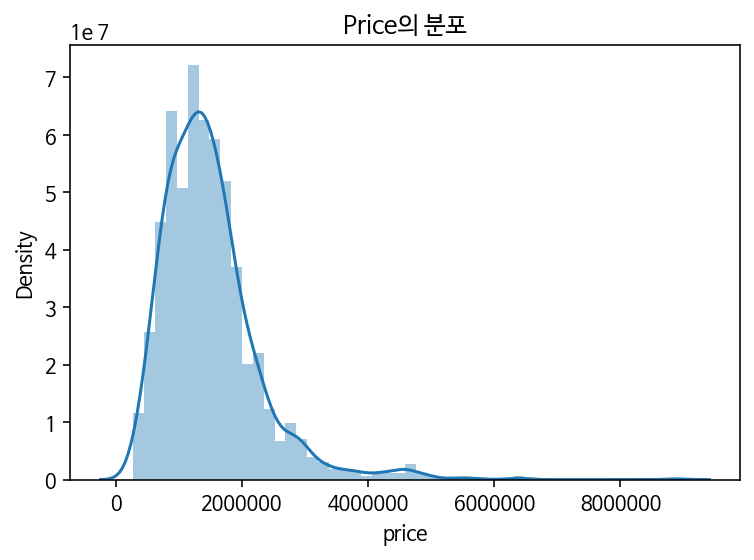

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, kstest
from sklearn.impute import SimpleImputer

sns.distplot(pre_df['price']).set_title('Price의 분포');

p_value_sh = shapiro(pre_df['price'])[1]
p_value_sp = normaltest(pre_df['price']).pvalue

print('Shapiro-Wilk test p-value : ', p_value_sh)
print('D\' Agostino and Pearson\'s test p-value : ', p_value_sp)

Shapiro-Wilk test와 D' Agostino and Pearson's의 정규성 검정 결과 두 test 모두 p-value가 0.05미만으로 정규성을 따르지 않는다고 말할 수 있다.

분포의 그래프를 확인해보아도 skewed되어 있는 것을 쉽게 확인할 수 있다.
 
회귀분석에서는 Target데이터가 꼭 normal분포를 따라야할 필요는 없지만 skewed일 경우 예측 성능에 부정적인 영향을 미친다. 이를 해결하기 위해 log함수를 사용할 수 있다.

Shapiro-Wilk test p-value :  1.1214289088457008e-06
D' Agostino and Pearson's test p-value :  0.00021712537943308115


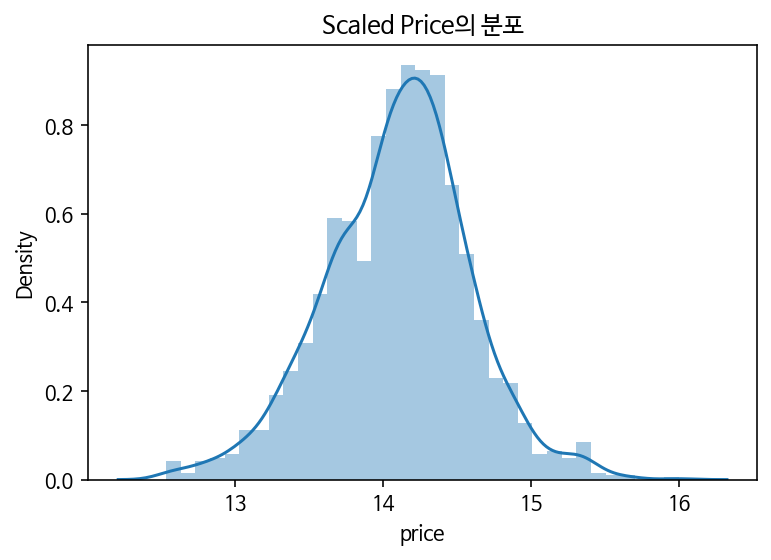

In [22]:
sns.distplot(np.log1p(pre_df['price'])).set_title('Scaled Price의 분포');

p_value_sh = shapiro(np.log1p(pre_df['price']))[1]
p_value_sp = normaltest(np.log1p(pre_df['price'])).pvalue

print('Shapiro-Wilk test p-value : ', p_value_sh)
print('D\' Agostino and Pearson\'s test p-value : ', p_value_sp)

아직 정규성을 만족하지는 않지만 어느정도 skewness는 해결되었음을 볼 수 있다. 이를 Target으로 회귀분석하는 것이 좋을듯하다.

#### 2. 독립변수들의 다중공선성 확인

In [23]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#다중공선성 확인을 위한 DataFrame생성
vif_data = pre_df.copy()

#numeric feature 추출
vif_data_num = SimpleImputer().fit_transform(vif_data[['price', 'size','core', 'pixel', 'RAM', 'SSD', '배터리', '두께', '무게']])
vif_data_num = pd.DataFrame(vif_data_num, columns = ['price', 'size','core', 'pixel', 'RAM', 'SSD', '배터리', '두께', '무게'])

#numeric feature들의 다중공선성 확인
num_features = "size+core+pixel+RAM+SSD+배터리+두께+무게"
y, X = dmatrices("price~"+num_features, data = vif_data_num, return_type = "dataframe")

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print('VIF : ')
pd.DataFrame([vif], columns = X.columns)

VIF : 


,Intercept,size,core,pixel,RAM,SSD,배터리,두께,무게
0,5242.108364,1.133375,1.296286,1.04461,1.194215,1.303934,1.025522,1.175605,1.123792


일반적으로 VIF값이 10이 넘어가는 경우 다중공선성이 있다고 판단한다. 위의 VIF결과에서는 intercept를 제외하고 모두 10미만이기에 다중공선성이 없다고 말할 수 있겠다.

#### 3. Feature들의 분포 및 correlation

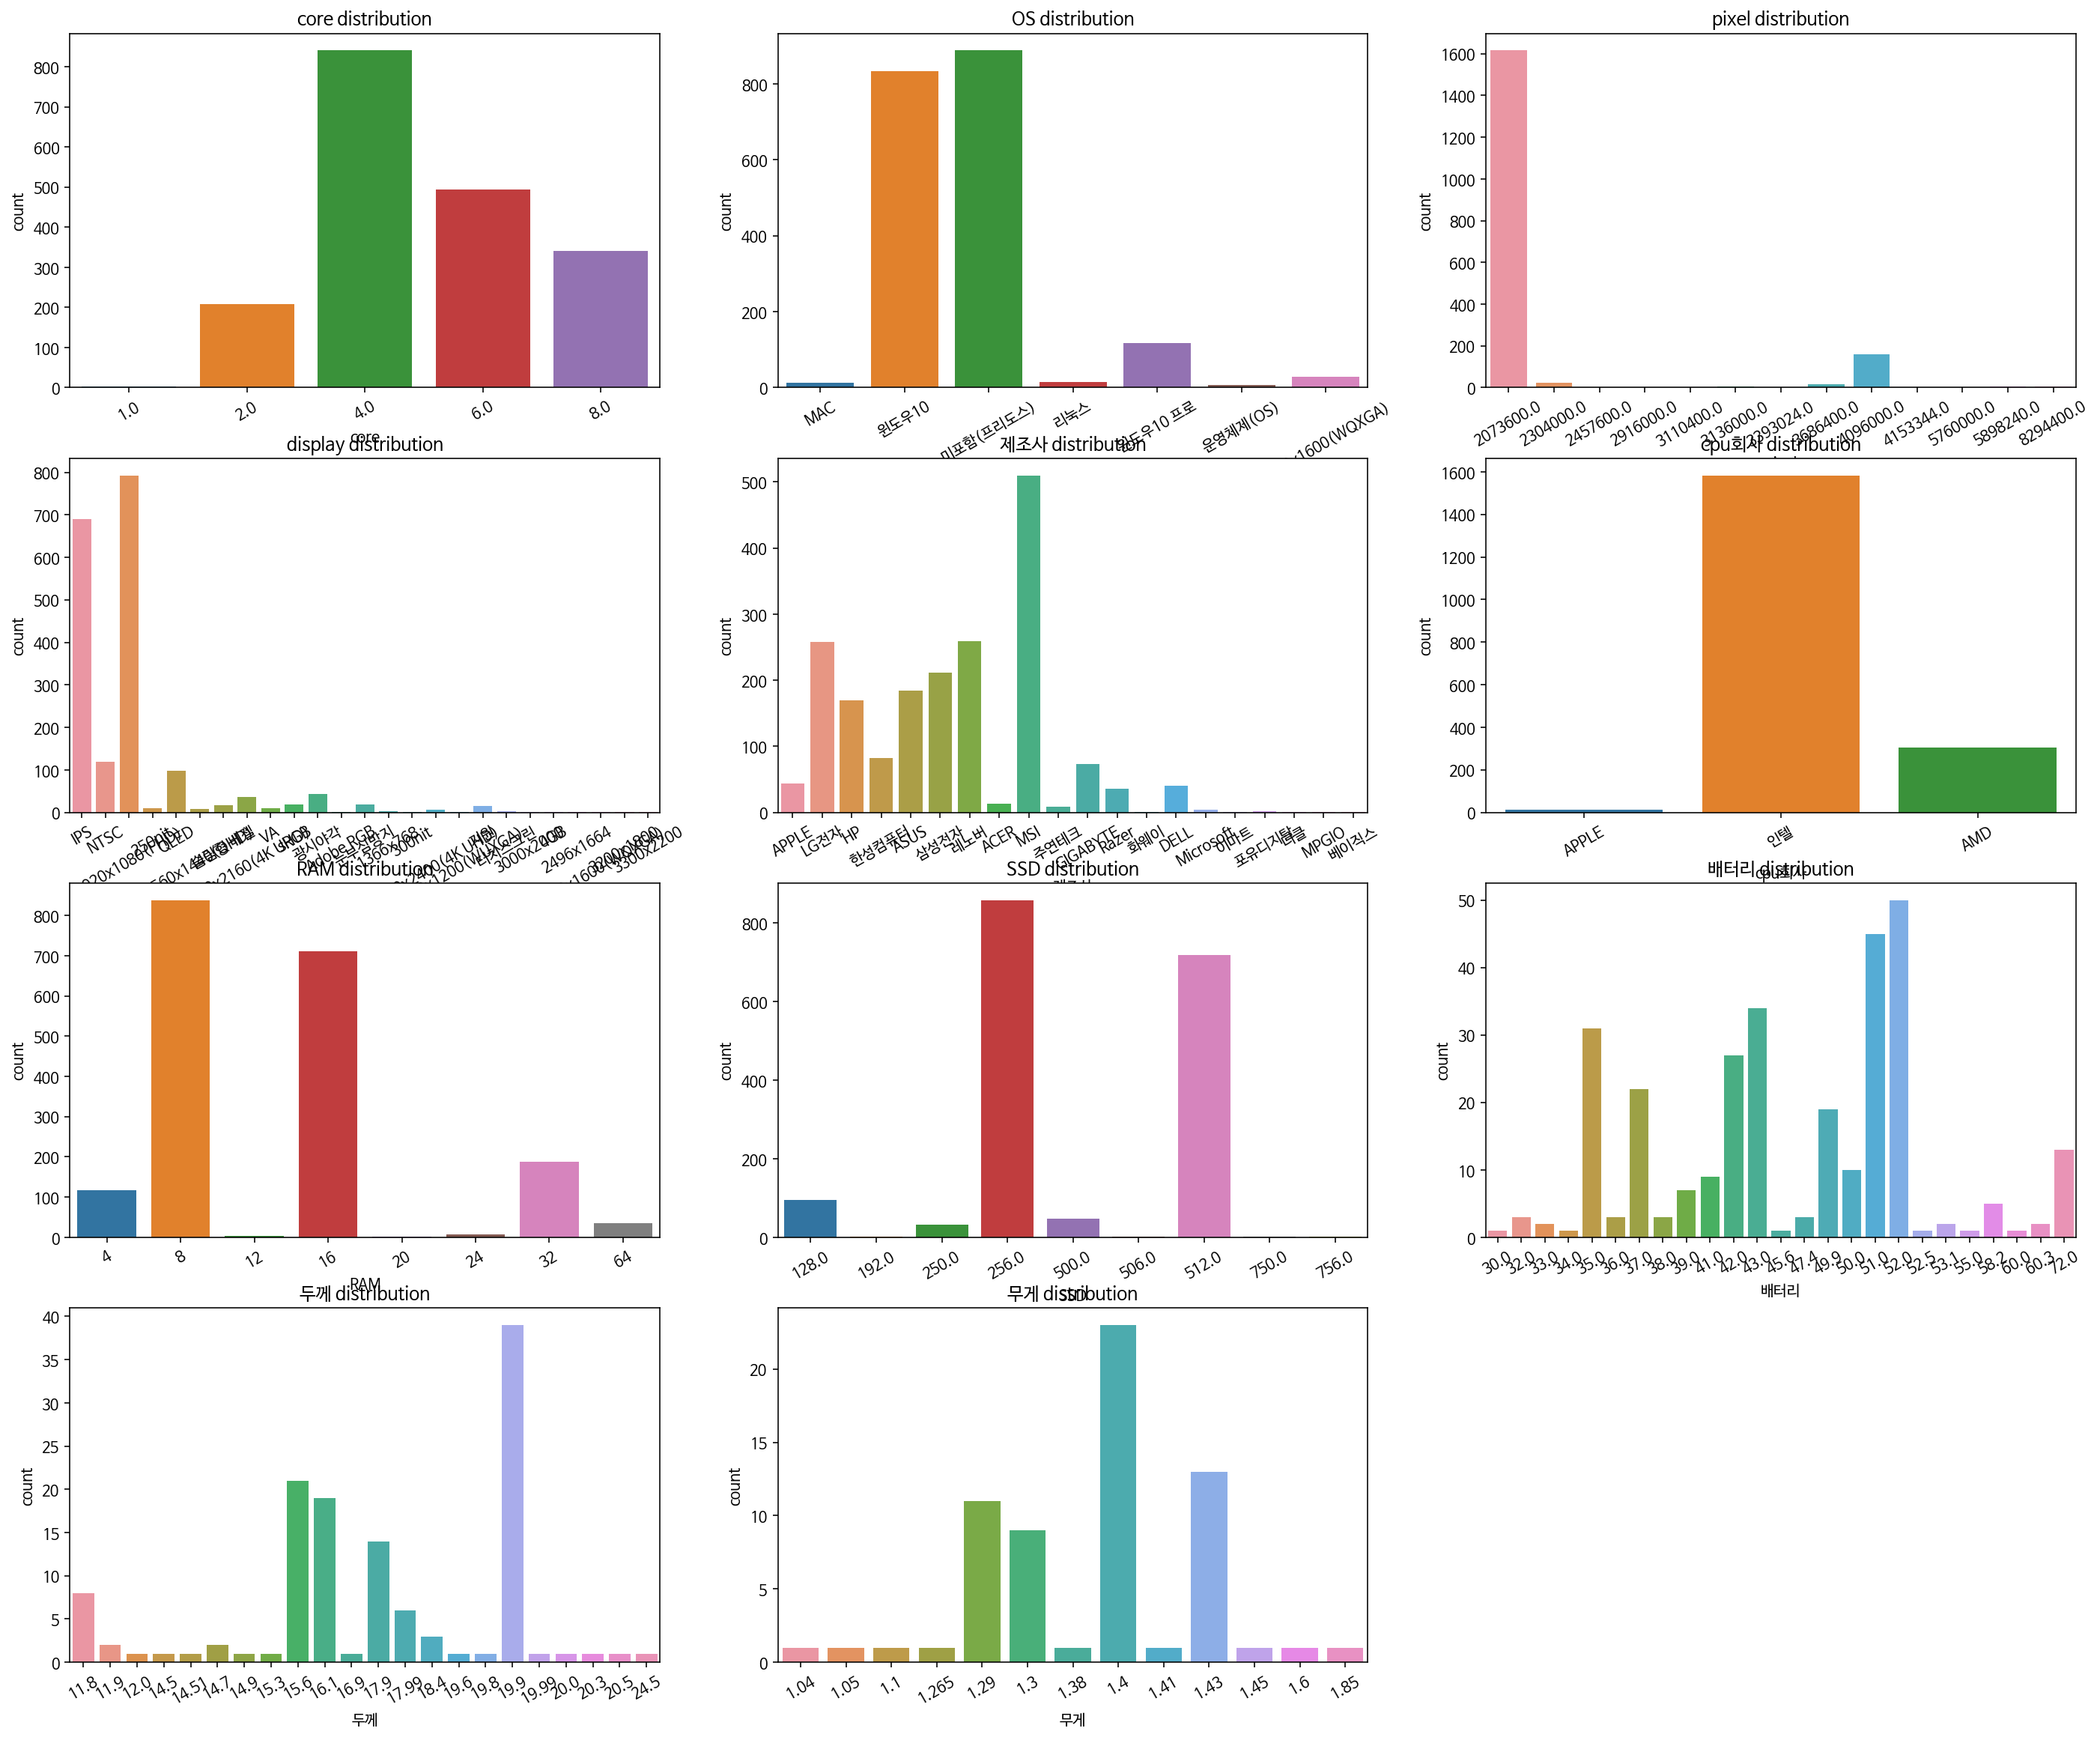

In [24]:
#Feature 분포확인

cols = list(pre_df.columns)
cols.remove('price')
cols.remove('cpu')
cols.remove('size')

plt.figure(figsize = (24,20))

for location, col in enumerate(cols):
    
    plt.subplot(4,3,location+1)

    count = sns.countplot(pre_df[col])
    count.set_title(col + ' distribution')
    plt.xticks(rotation = 30)

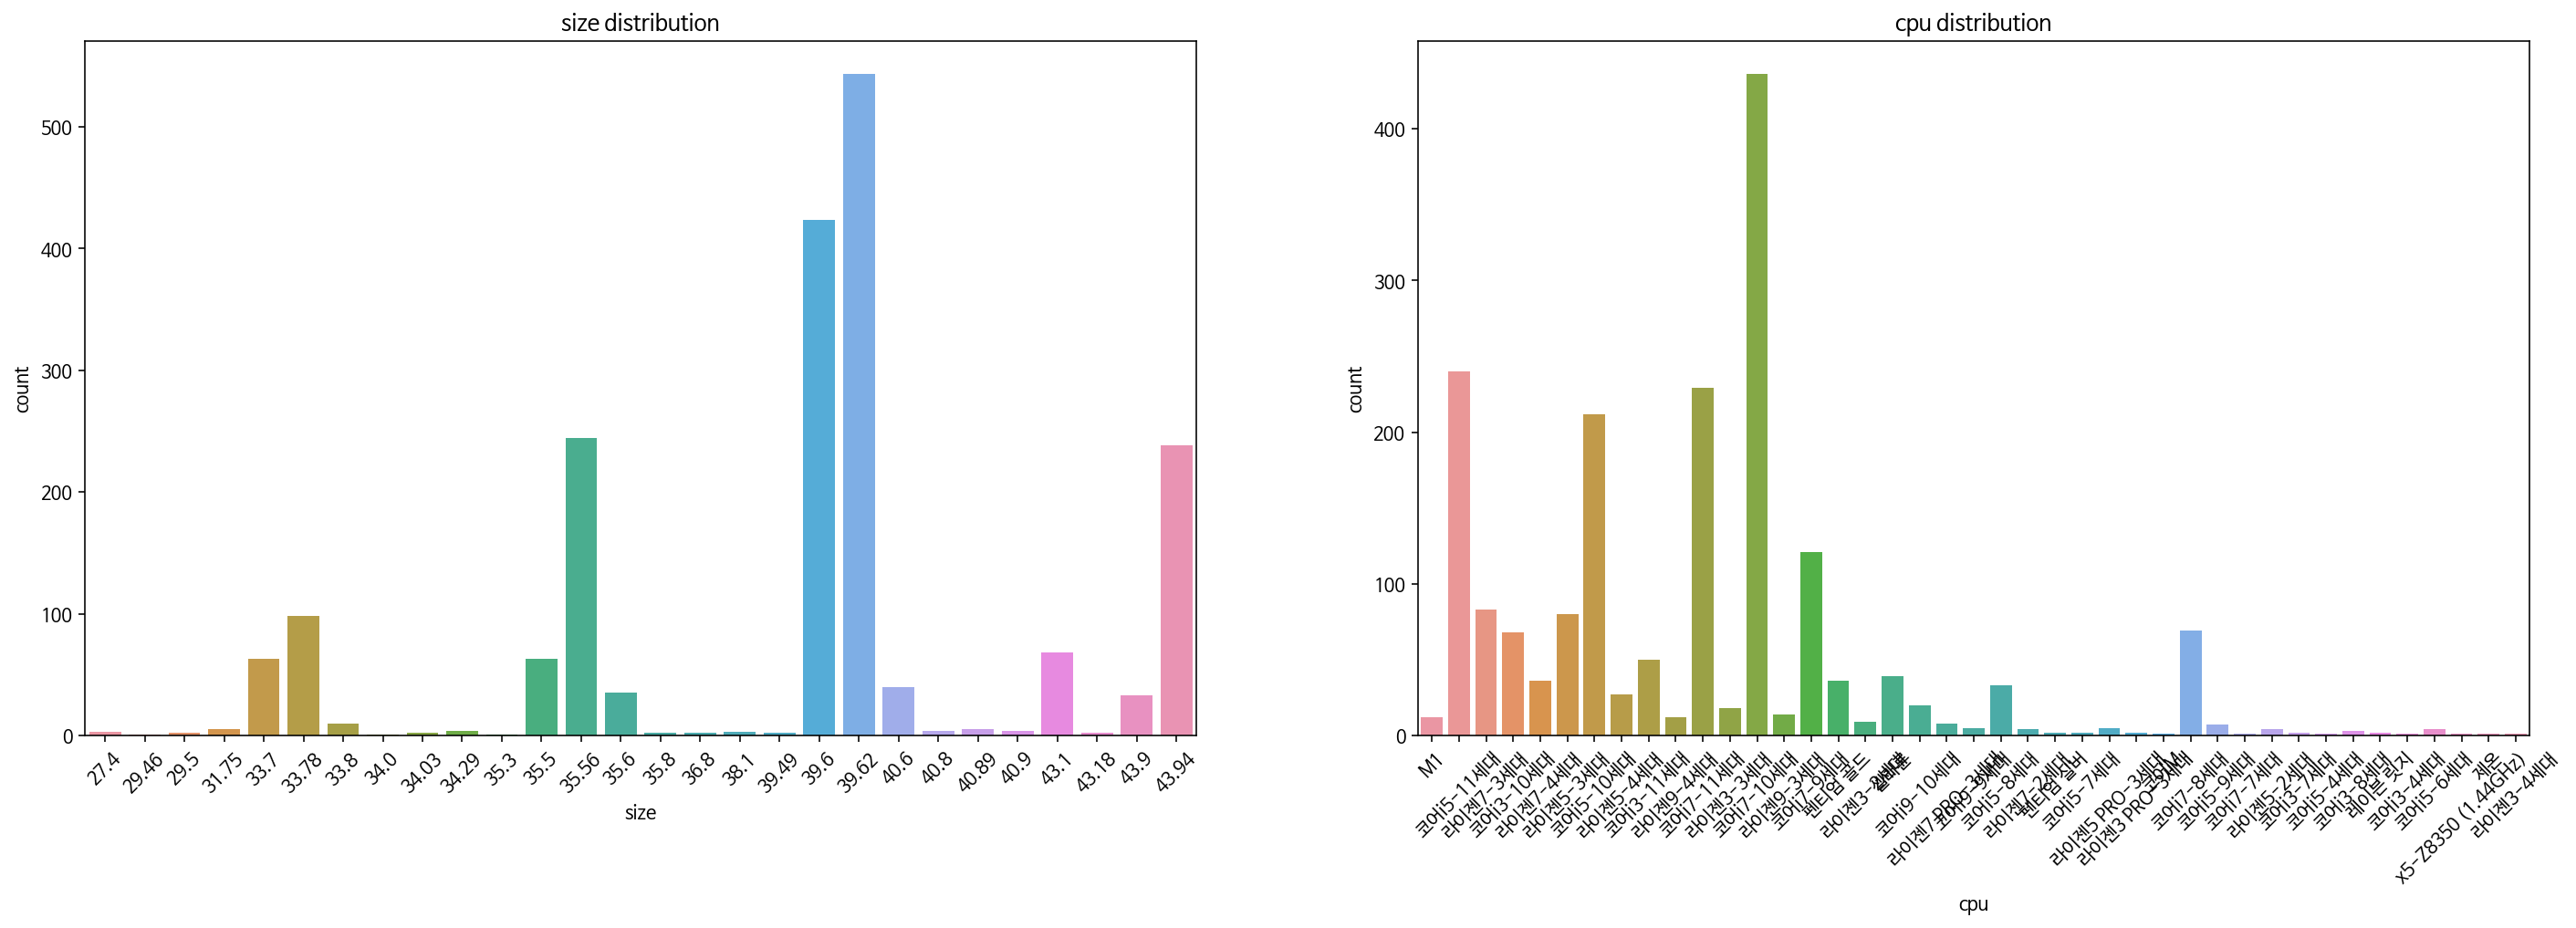

In [25]:
col2 = ['size', 'cpu']

plt.figure(figsize = (24,7))

for location, col in enumerate(col2):
    
    plt.subplot(1,2,location+1)

    count = sns.countplot(pre_df[col])
    count.set_title(col + ' distribution')
    plt.xticks(rotation =45)

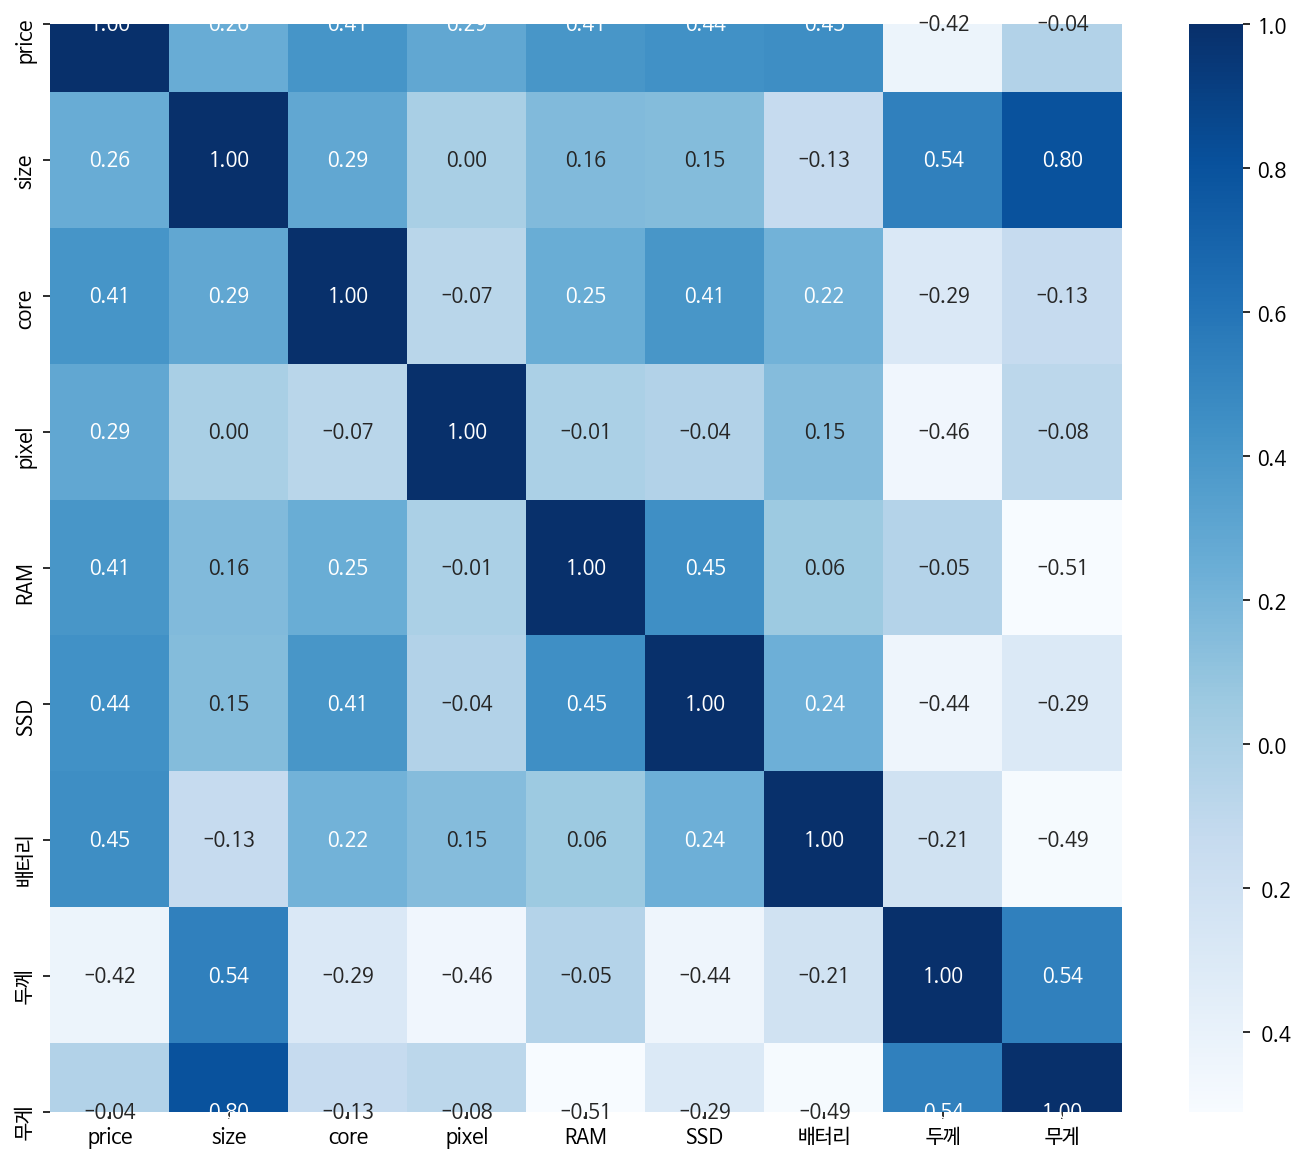

In [26]:
# correlation 확인

plt.figure(figsize=(12,10))

sns.heatmap(pre_df.corr(), annot = True, fmt = '.2f', cmap = 'Blues');

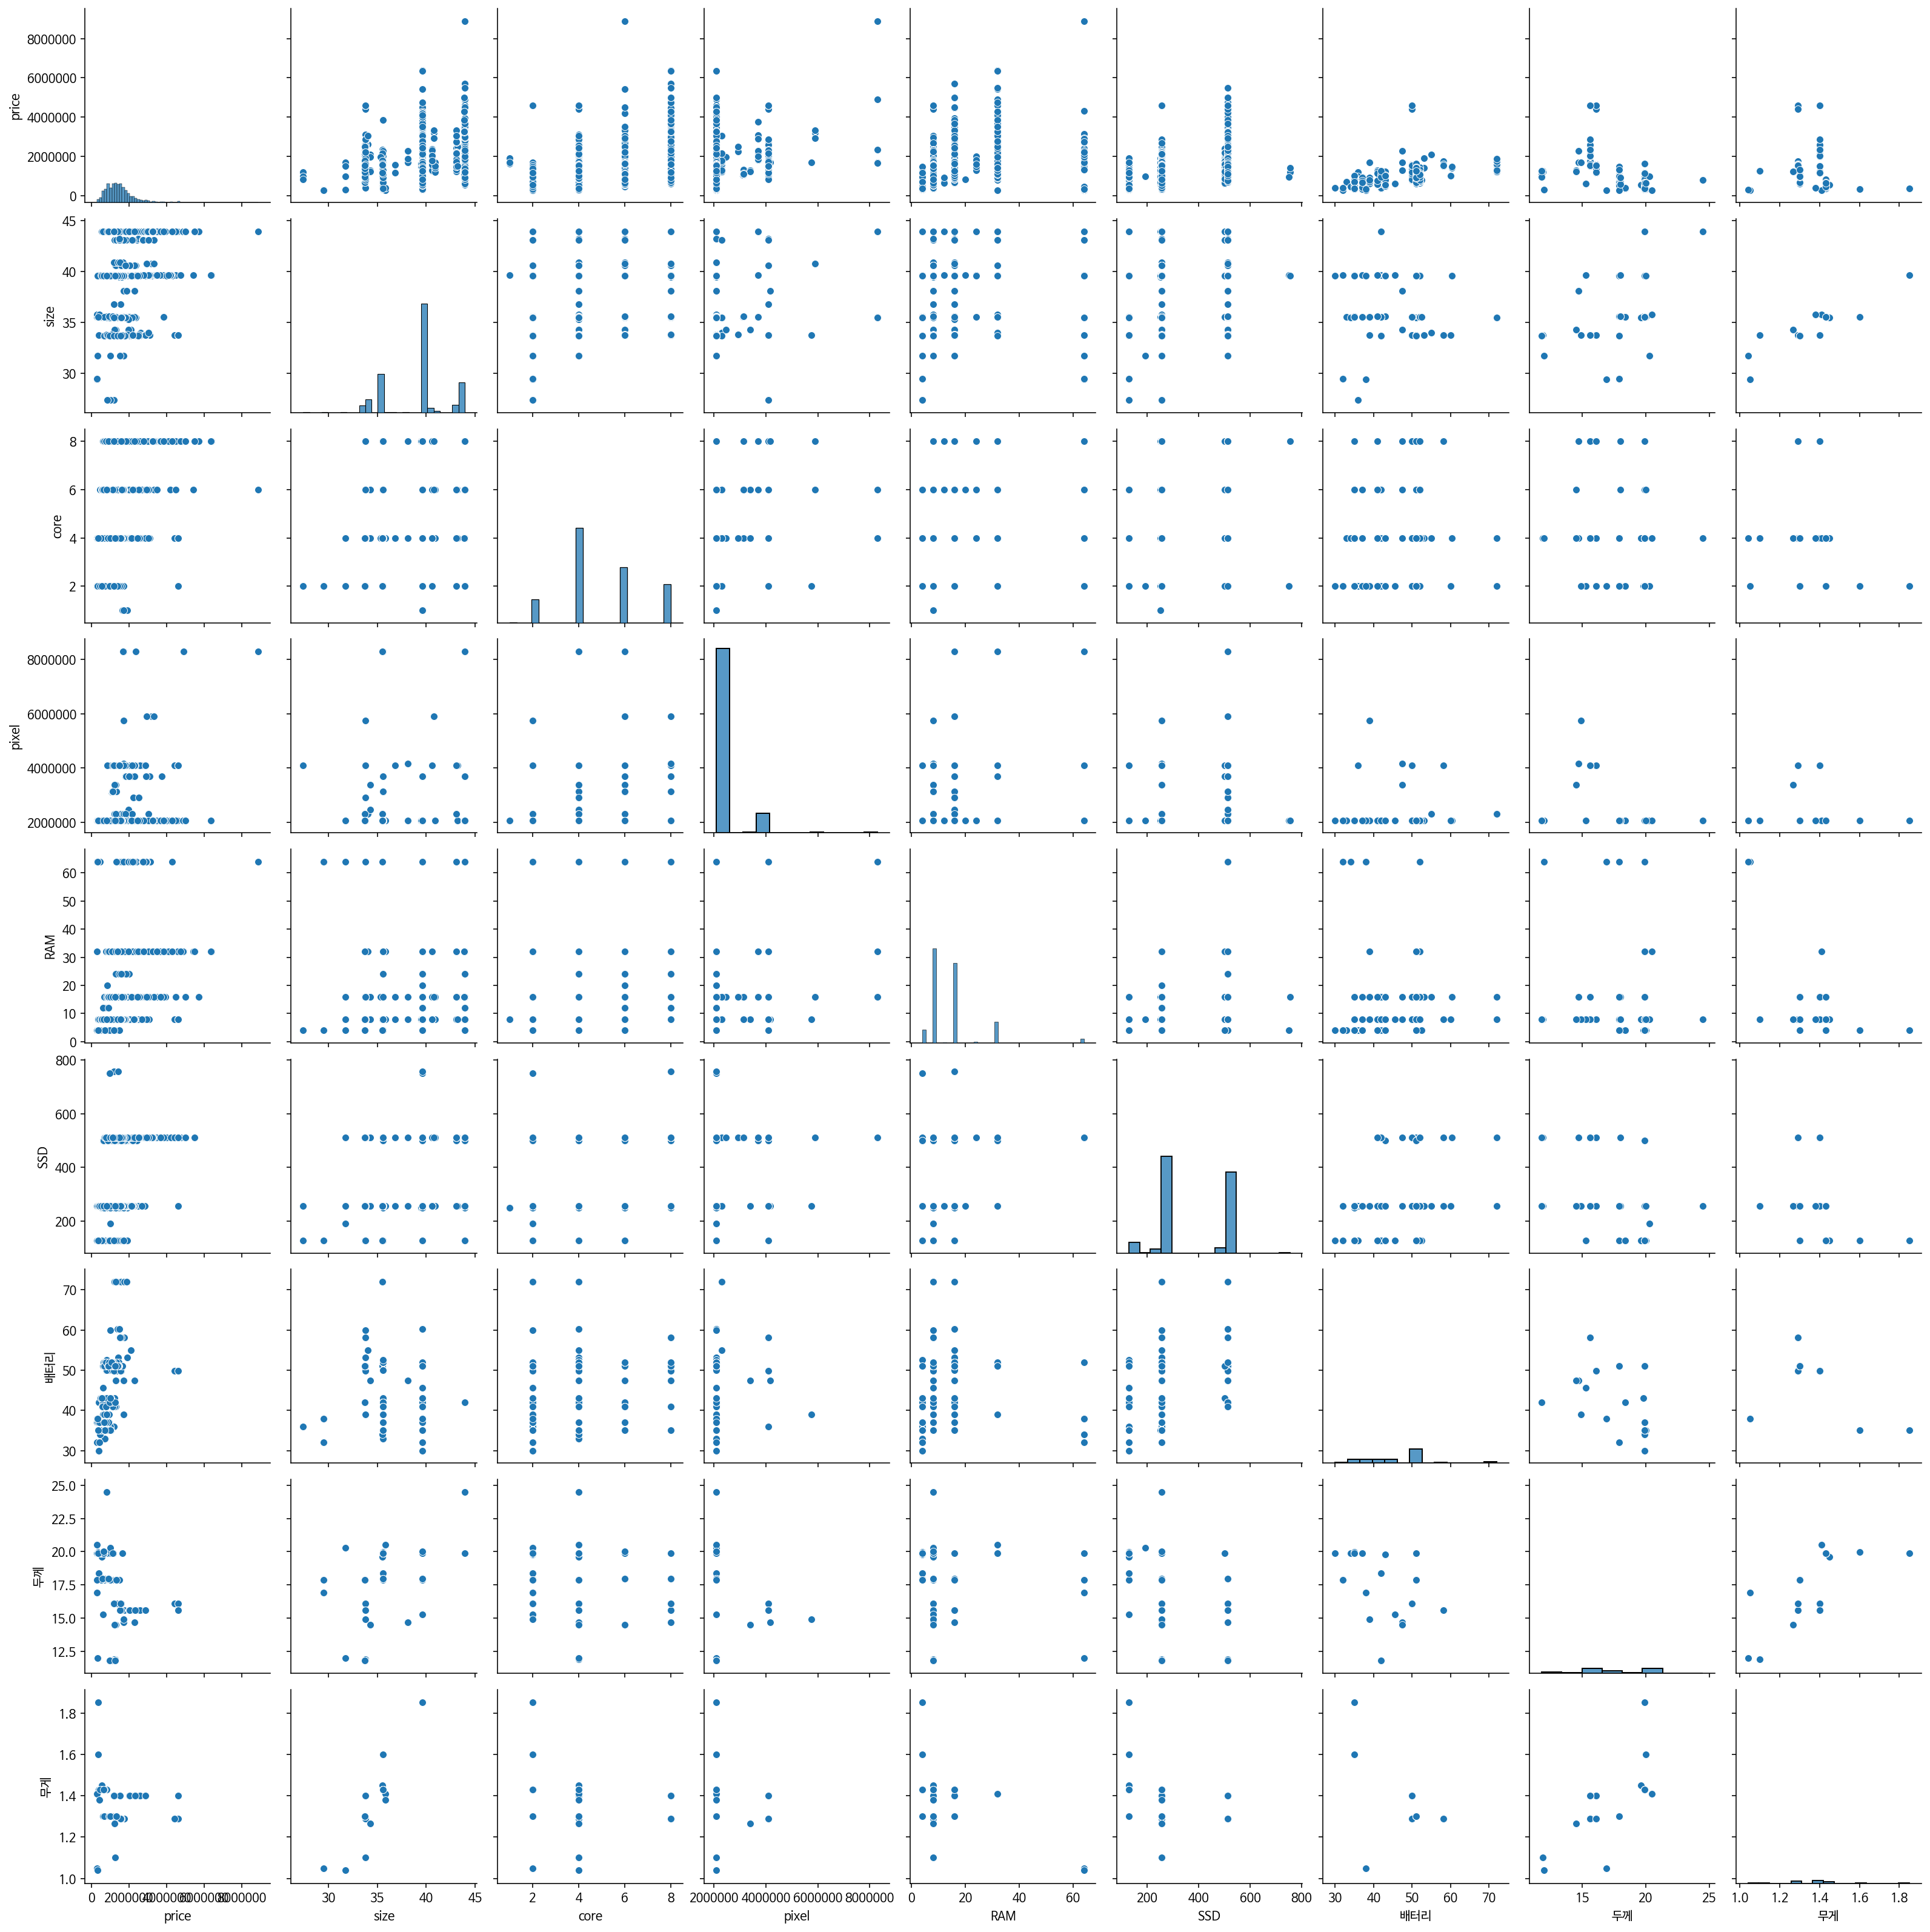

In [27]:
sns.pairplot(pre_df)

## 모델링

* 평가지표 : Adjusted R square

R square가 가지는 의미는 데이터에 대한 회귀모델의 설명력이다. 일반적으로 R square는 의미없는 feature라도 feature가 많아지면 많아질수록 값이 커진다. 이러한 문제때문에 가장 좋은 모델을 선정하기에는 R square를 이용하기는 힘들다. 이런 R square의 문제를 보완하기 위해 Adjusted R square를 평가지표로 사용하겠다.

In [28]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, TargetEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#회귀
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

#분류
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [29]:
#n은 데이터의 개수, p는 사용된 feature의 개수
def adj_r2(r2, n, p):
    de = (n-1)*(1-r2**2)
    nu = n-p-1

    adj = 1-(de/nu)

    return adj

#### 1. Baseline

In [30]:
result = sm.OLS(y, X).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     150.0
Date:                Thu, 29 Apr 2021   Prob (F-statistic):          1.49e-195
Time:                        02:22:51   Log-Likelihood:                -28028.
No. Observations:                1901   AIC:                         5.607e+04
Df Residuals:                    1892   BIC:                         5.612e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.964e+06   1.02e+06     -3.890      0.0

간단하게 numeric feature들 만으로 Simple linear regression을 진행한 결과이다. 그 결과 평가지표인 R-squared 값은 0.388로 계산되었다.

#### 2. Regression

In [31]:
#데이터분리

target = np.log1p(pre_df['price'])
features = list(pre_df.columns)
features.remove('price')

X_train, X_test, y_train, y_test = train_test_split(pre_df[features], target, test_size = 0.2, random_state = 2)

##### linear model
---



In [32]:
pipe = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    LinearRegression()
)

params = {
    'simpleimputer__strategy' : ['median', 'mean']
}

reg = GridSearchCV(
    pipe,
    param_grid=params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
    )

reg.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('targetencoder',
                                        TargetEncoder(cols=None,
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      min_samples_leaf=1,
                                                      return_df=True,
                                                      smoothing=1.0,
                                                      verbose=0)),
                                       ('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                 

In [33]:
linear_model = reg.best_estimator_
print('Best parameters : ', reg.best_params_)
print('Best score : ', reg.best_score_)

Best parameters :  {'simpleimputer__strategy': 'mean'}
Best score :  0.7118130115380403


In [34]:
linear = linear_model.named_steps['linearregression']

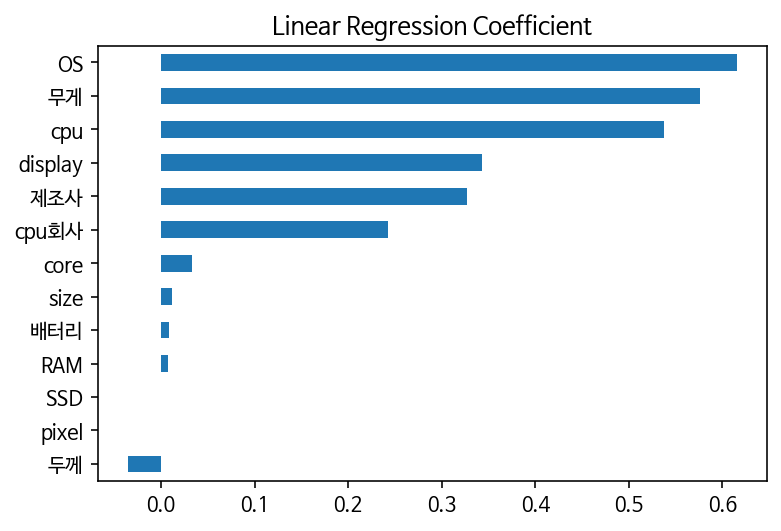

In [35]:
coefficient = pd.Series(linear.coef_, features).sort_values()
coefficient.plot.barh()
plt.title('Linear Regression Coefficient')
plt.show()

In [36]:
r2_linear = linear_model.score(X_test, y_test)
print('R square : ', r2_linear)
print('Adjusted R square : ', adj_r2(r2_linear, len(X_test), len(features)))

R square :  0.6967603520144656
Adjusted R square :  0.46724930652027896


##### Ridge
---

In [37]:
pipe = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    Ridge()
)

params = {
    'simpleimputer__strategy' : ['median', 'mean'],
    'ridge__alpha' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
}

reg2 = GridSearchCV(
    pipe,
    param_grid=params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
    )

reg2.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('targetencoder',
                                        TargetEncoder(cols=None,
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      min_samples_leaf=1,
                                                      return_df=True,
                                                      smoothing=1.0,
                                                      verbose=0)),
                                       ('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                 

In [38]:
ridge_model = reg2.best_estimator_
print('Best parameters : ', reg2.best_params_)
print('Best score : ', reg2.best_score_)

Best parameters :  {'ridge__alpha': 1, 'simpleimputer__strategy': 'mean'}
Best score :  0.7121909195100062


In [39]:
ridge = ridge_model.named_steps['ridge']

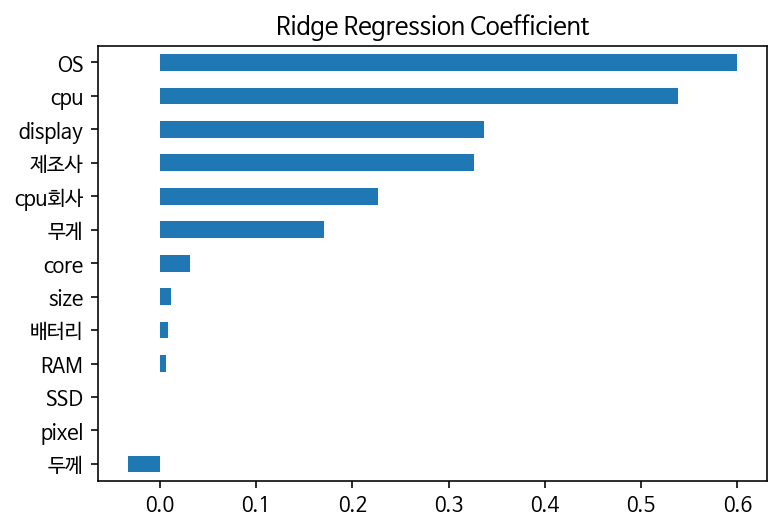

In [40]:
coefficient = pd.Series(ridge.coef_, features).sort_values()
coefficient.plot.barh()
plt.title('Ridge Regression Coefficient')
plt.show()

In [41]:
r2_ridge = linear_model.score(X_test, y_test)
print('R square : ', r2_ridge)
print('Adjusted R square : ', adj_r2(r2_ridge, len(X_test), len(features)))

R square :  0.6967603520144656
Adjusted R square :  0.46724930652027896


##### Lasso

In [42]:
pipe = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    Lasso()
)

params = {
    'simpleimputer__strategy' : ['median', 'mean'],
    'lasso__alpha' : [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
}

reg4 = GridSearchCV(
    pipe,
    param_grid=params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
    )

reg4.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('targetencoder',
                                        TargetEncoder(cols=None,
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      min_samples_leaf=1,
                                                      return_df=True,
                                                      smoothing=1.0,
                                                      verbose=0)),
                                       ('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                 

In [43]:
lasso_model = reg4.best_estimator_
print('Best parameters : ', reg4.best_params_)
print('Best score : ', reg4.best_score_)

Best parameters :  {'lasso__alpha': 0.001, 'simpleimputer__strategy': 'mean'}
Best score :  0.7111298800881027


In [44]:
lasso = lasso_model.named_steps['lasso']

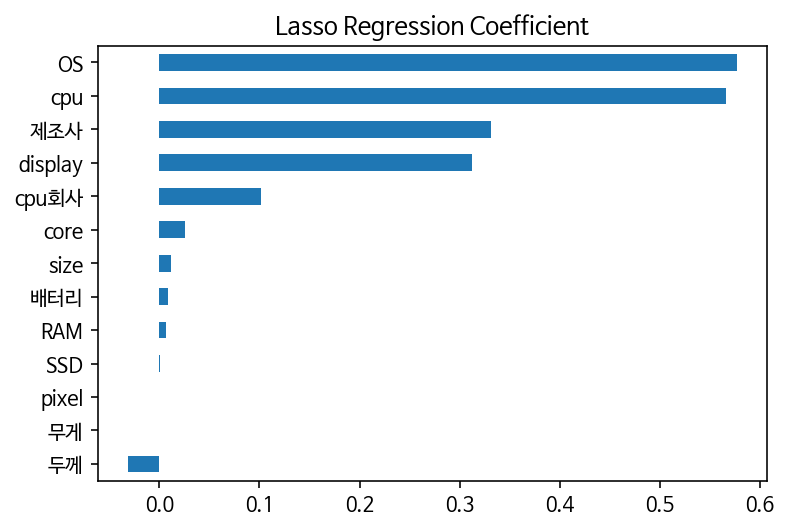

In [45]:
coefficient = pd.Series(lasso.coef_, features).sort_values()
coefficient.plot.barh()
plt.title('Lasso Regression Coefficient')
plt.show()

In [46]:
r2_lasso = linear_model.score(X_test, y_test)
print('R square : ', r2_lasso)
print('Adjusted R square : ', adj_r2(r2_lasso, len(X_test), len(features)-1))

R square :  0.6967603520144656
Adjusted R square :  0.4686969986221261


##### XGboostRegression
---

In [47]:
pipe = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    XGBRegressor(
        random_state = 2,
        n_jobs = -1
    )
)

params = {
    'simpleimputer__strategy' : ['median', 'mean'],
    'xgbregressor__n_estimators' : [100, 200,300],
    'xgbregressor__learning_rate' : [0.1, 0.2, 0.3],
    'xgbregressor__max_depth' : [5, 7, 10, 15]

}

reg3 = GridSearchCV(
    pipe,
    param_grid=params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
    )

reg3.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.0min finished


[02:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('targetencoder',
                                        TargetEncoder(cols=None,
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      min_samples_leaf=1,
                                                      return_df=True,
                                                      smoothing=1.0,
                                                      verbose=0)),
                                       ('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                 

In [48]:
xgb_model = reg3.best_estimator_
print('Best parameters : ', reg3.best_params_)
print('Best score : ', reg3.best_score_)

Best parameters :  {'simpleimputer__strategy': 'mean', 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 7, 'xgbregressor__n_estimators': 300}
Best score :  0.850983850296049


In [49]:
r2_xgb = xgb_model.score(X_test, y_test)
print('R square : ', r2_xgb)
print('Adjusted R square : ', adj_r2(r2_xgb, len(X_test), len(features)))

R square :  0.8245240072819966
Adjusted R square :  0.6684990154279498


###### XGB Error

In [50]:
xgb = XGBRegressor(
        random_state = 2,
        n_jobs = -1,
        learning_rate = 0.2,
        max_depth = 7,
        n_estimators = 100
)
encoder = xgb_model.named_steps['targetencoder']
imp = xgb_model.named_steps['simpleimputer']

In [51]:
trans = make_pipeline(
    encoder,
    imp
)

X_train_trans = trans.transform(X_train)
X_test_trans = trans.transform(X_test)

X_train_trans_df = pd.DataFrame(X_train_trans, columns = features)
X_test_trans_df = pd.DataFrame(X_test_trans, columns = features)

In [52]:
eval_set = [(X_train_trans_df, y_train),
            (X_test_trans_df, y_test)]

xgb.fit(X_train_trans_df, y_train,
        eval_set = eval_set,
        eval_metric = 'rmse',
        early_stopping_rounds = 50)

[02:25:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10.8906	validation_1-rmse:10.9061
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:8.71842	validation_1-rmse:8.73673
[2]	validation_0-rmse:6.9806	validation_1-rmse:6.99952
[3]	validation_0-rmse:5.59076	validation_1-rmse:5.61202
[4]	validation_0-rmse:4.47941	validation_1-rmse:4.50167
[5]	validation_0-rmse:3.59087	validation_1-rmse:3.61413
[6]	validation_0-rmse:2.88048	validation_1-rmse:2.90678
[7]	validation_0-rmse:2.31277	validation_1-rmse:2.34118
[8]	validation_0-rmse:1.85904	validation_1-rmse:1.88945
[9]	validation_0-rmse:1.49702	validation_1-rmse:1.52722
[10]	validation_0-rmse:1.20816	validation_1-rmse:1.23937
[11]	validation_0-rmse:0.977547	validation_1-rmse:1.00868
[12]	validation_0-rmse:0.794243	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=2,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

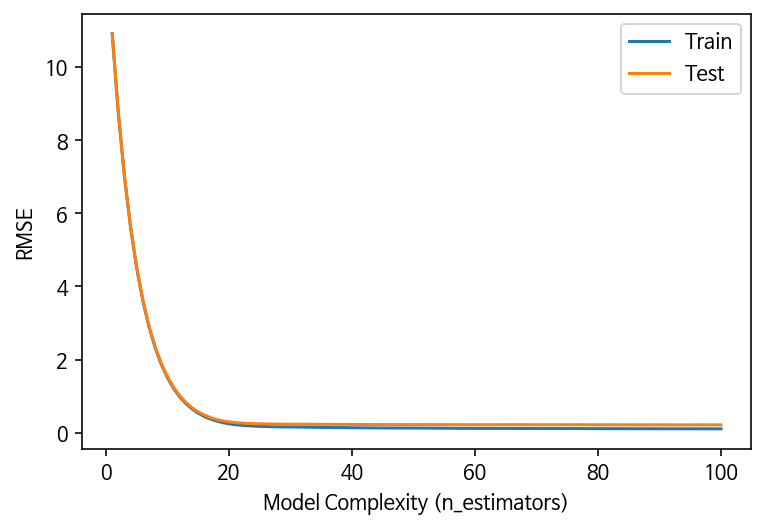

In [53]:
# training, test error 시각화

results = xgb.evals_result()
train_error = results['validation_0']['rmse']
test_error = results['validation_1']['rmse']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label = 'Train')
plt.plot(epoch, test_error, label = 'Test')
plt.ylabel('RMSE')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

###### Feature importance

* Permutation importance

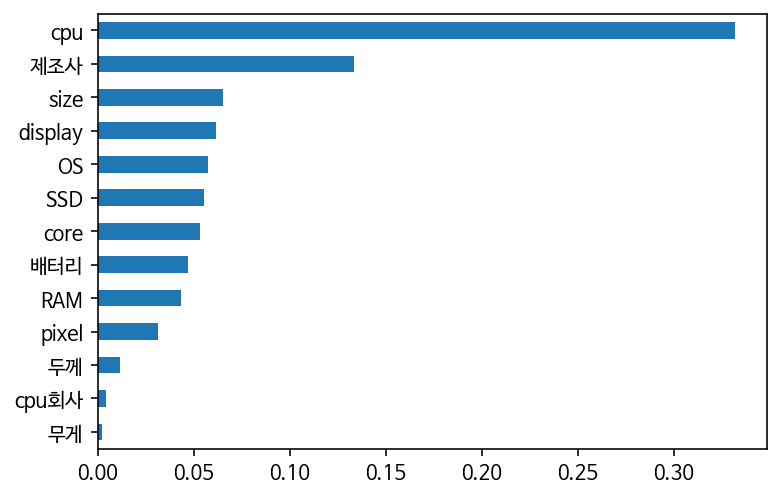

In [54]:
#permutation importance

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    xgb,
    scoring = 'r2',
    n_iter = 5,
    random_state =2
)

permuter.fit(X_test_trans_df, y_test)

importances_permuter = pd.Series(permuter.feature_importances_, features).sort_values()

importances_permuter.plot.barh();

* PDP isolation

In [55]:
# PDP isolation

from pdpbox.pdp import pdp_isolate, pdp_plot

for i, feature in enumerate(features):
    isolated = pdp_isolate(
        model = xgb,
        dataset = X_test_trans_df,
        model_features = X_test_trans_df.columns,
        feature = feature,
        grid_type = 'percentile',
        num_grid_points = 100
    )
    pdp_plot(isolated,
             feature_name = feature,
             plot_lines = True,
             frac_to_plot = 10,
             plot_pts_dist = True
             )

Output hidden; open in https://colab.research.google.com to view.

* Shap

In [56]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_trans_df)

### Draw SHAP plots ###
shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features = X_test_trans_df
)

## 노트북 가격 예측기
아래의 셀을 실행시켜주세요.

원하는 노트북 스펙 :<br>
39.6cm(15.6인치), 코어i7-11세대, 옥타코어, 윈도우10, 2560x1440(QHD), IPS, 삼성, 인텔, 16GB, 512GB, 60Wh, 15mm, 1.2kg

In [58]:
def laptop_price(df):

    #결과값 예측
    df['price'] = '1,000'
    pre_df = pre(df)

    pre_df.drop('price', axis = 1, inplace = True)

    result = xgb_model.predict(pre_df)

    return np.exp(result)[0], pre_df

#입력
input_list = []
ex_list = ['39.6cm(15.6인치)', '코어i5-11세대', '쿼드코어', '윈도우10', '1920x1080(FHD)', 'IPS', 'LG전자', '인텔', '8GB', '256GB', '51Wh', '19.9mm', '1.2kg']

for i, col in enumerate(features):
    print(col + ' / ' + 'ex) ' + ex_list[i])
    
    inputs = str(input())
    input_list.append(inputs)

    print()

my_laptop = pd.DataFrame([input_list], columns = features)

#결과값 추출
predict_price, row = laptop_price(my_laptop)

#shap
xgb_final = xgb_model.named_steps['xgbregressor']
trans_pre_df = trans.transform(row)

explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(trans_pre_df)

#target scaling
b = np.exp(explainer.expected_value + shap_values.sum())
a = np.exp(explainer.expected_value)

### Draw SHAP plots ###
shap.initjs()

shap.force_plot(
    base_value = a,
    shap_values = (shap_values/shap_values.sum())*(b-a),
    features = row
)

size / ex) 39.6cm(15.6인치)
39.6cm(15.6인치)

cpu / ex) 코어i5-11세대
코어i7-11세대

core / ex) 쿼드코어
옥타코어

OS / ex) 윈도우10
윈도우10

pixel / ex) 1920x1080(FHD)
2560x1440(QHD)

display / ex) IPS
IPS

제조사 / ex) LG전자
삼성

cpu회사 / ex) 인텔
인텔

RAM / ex) 8GB
16GB

SSD / ex) 256GB
512GB

배터리 / ex) 51Wh
60Wh

두께 / ex) 19.9mm
15mm

무게 / ex) 1.2kg
1.2kg



## 결과

In [61]:
input_list.append(predict_price)
features.append('적정 가격')

spec = pd.DataFrame([input_list], columns = features)
spec

,size,cpu,core,OS,pixel,display,제조사,cpu회사,RAM,SSD,배터리,두께,무게,적정 가격,적정 가격
0,39.6cm(15.6인치),코어i7-11세대,옥타코어,윈도우10,2560x1440(QHD),IPS,삼성,인텔,16GB,512GB,60Wh,15mm,1.2kg,1508643.875,1508643.875


In [62]:
print('당신이 원하는 노트북의 적정 가격은 : {}원'.format(predict_price))

당신이 원하는 노트북의 적정 가격은 : 1508643.875원


## 한계 및 방향성

display, OS와 같이 수치상으로 하드웨어의 의미와 성능을 잘 표현하지 못하는 feature인 경우에, 새로운 종류의 하드웨어가 나온다면 그것을 적절하게 예측하기가 힘들 것으로 판단된다. 또한 노트북의 가격은 단순 하드웨어의 성능만으로 결정되지않는 경우도 존재하기 때문에 이를 반영하여 예측하기가 쉽지않다. 추후에 더욱 많은 양의 데이터와 feature들을 수집하여 더 좋은 성능을 내는 모델을 예측해보고자 한다. 또한 노트북 가격 예측모델을 웹에서 구현하여 조금이나마 노트북 구매를 원하는 사람들에게 도움을 주고 싶다.